## The Images
now that we have an idea of what kind of the balance of our classes, lets take a look at the images which will serve as our training data.

In [2]:
%matplotlib inline
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import misc
import numpy as np

In [3]:
images = glob.glob(os.path.join('data', 'samples', '*'))

In [4]:
eye = misc.imread(images[0])
eye.shape, eye.dtype

((3168L, 4752L, 3L), dtype('uint8'))

In [5]:
eye.min(), eye.max()

(0, 255)

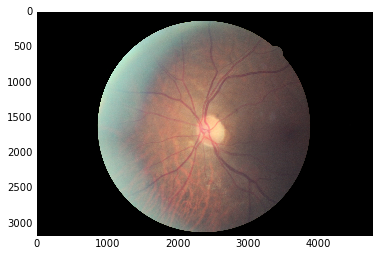

In [6]:
plt.imshow(eye)
plt.show()

In [7]:
eye_small = misc.imresize(eye, size=(512, 512, 3))
eye_small.shape

(512L, 512L, 3L)

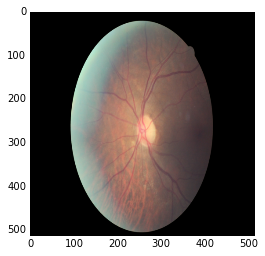

In [8]:
plt.imshow(eye_small)
plt.show()

In [9]:
def resize_directory(input_dir, output_dir, size=(512, 512, 3)):
    files = os.listdir(input_dir)
    for f in files:
        inpath = os.path.join(input_dir, f)
        outpath = os.path.join(output_dir, f)
        img = misc.imread(inpath)
        img = misc.imresize(img, size=size)
        misc.imsave(outpath, img)

In [10]:
input_dir = os.path.join('data', 'samples')
output_dir = os.path.join('data', 'processed_samples')
resize_directory(input_dir, output_dir)

In [11]:
new_images = glob.glob(os.path.join(output_dir, "*"))

In [12]:
def training_matrix_from_dir(directory):
    images = glob.glob(os.path.join(output_dir, "*"))
    return np.array([misc.imread(i) for i in images])

In [13]:
X_sample = training_matrix_from_dir(output_dir)
X_sample.shape

(10L, 512L, 512L, 3L)

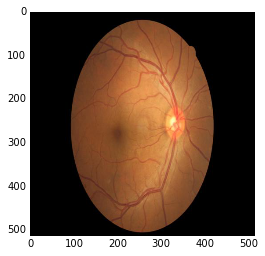

In [14]:
plt.imshow(X_sample[9])
plt.show()

In [15]:
labels = pd.read_csv(os.path.join('data', 'trainLabels.csv'))
y_sample = labels.loc[:9, 'level'].values

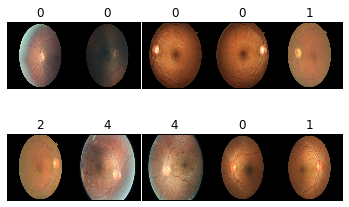

In [19]:
fig = plt.figure()
for idx in xrange(10):
    ax = fig.add_subplot(2, 5, idx+1)
    ax.imshow(X_sample[idx])
    plt.subplots_adjust(wspace=.02, hspace=.002)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(y_sample[idx])

In [29]:
X_sample = X_sample.reshape(len(X_sample), 3, 512, 512)

In [30]:
np.save(os.path.join('data', 'train', 'X_sample'), X_sample)
np.save(os.path.join('data', 'train', 'y_sample'), y_sample)          

In [31]:
X_new = np.load(os.path.join('data', 'train', 'X_sample.npy'))

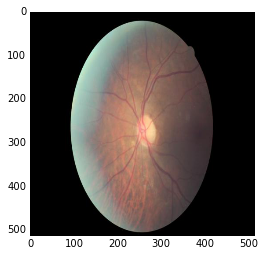

In [33]:
plt.imshow(X_new[0].reshape(512, 512, 3))